# About this notebook 

#### Feature: Age

This is one of a series of notebooks (one for each feature of interest) that explores the feature for missing data, data characteristics, correlation with the rate of adoption (predictor variable) and other points of interest that might be helpful to know (and deal with) prior to machine learning.

<div class="span5 alert alert-success">
<p> <I> Feature Description: </I> The "Age" data represents that age of the pet when listed, in months  
    <I> Source: </I> https://www.kaggle.com/c/petfinder-adoption-prediction/data  </p>
</div>

<div class="span5 alert alert-success">
<p> <I> Predictor (Adoption Speed) Description: </I> 

Contestants are required to predict this value. The value is determined by how quickly, if at all, a pet is adopted.   
<br> 
The values are determined in the following way:   
0 - Pet was adopted on the same day as it was listed.    
1 - Pet was adopted between 1 and 7 days (1st week) after being listed.    
2 - Pet was adopted between 8 and 30 days (1st month) after being listed.    
3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed.    
4 - No adoption after 100 days of being listed.    

</p>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

%cd C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData

C:\Users\Ken\Documents\KenP\Applications-DataScience\SpringboardCourseWork\CapstoneProject2Repository\09 PetfindersData\TrainingData


<div class="span5 alert alert-info">
<p> <B>  Imports and Data Loading: </B>  </p>
</div>

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import the csv file

dfi = pd.read_csv('train.csv')
dfi.head(1)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,1,Lil Milo,2,0,26,2,2,0,0,2,...,1,1,0,41326,1a2113010d6048d5410b265347b35c91,0,Milo went missing after a week with her new ad...,375905770,3,3


<div class="span5 alert alert-info">
<p> <B>  Missing Data: </B>   
There are no missing data values, but there are 10 pet with an age >12 years.  These will probably be dropped from the dataset.
</p>
</div>

In [4]:
#Create Age Dataframe and add an age in years column

dfa = dfi[['Age']]
dfa['ageinyears'] = round(dfa.Age/12)
dfa.columns = ['ageinmonths','ageinyears']

In [5]:
# Percentage of missing values in each column
pd.DataFrame(
    dfa.isnull().sum() / len(dfa),
    columns=['% Missing Values']
).transpose()

,ageinmonths,ageinyears
% Missing Values,0.0,0.0


<div class="span5 alert alert-info">
<p> <B>  Characteristics of the data: </B>  </p>
</div>

In [6]:
#Create a dataframe of agecounts in months

dfac = dfa['ageinmonths'].value_counts()
dfac = dfac.reset_index()

dfac.columns = ['ageinmonths','agecount']
dfac = dfac.sort_values('ageinmonths')

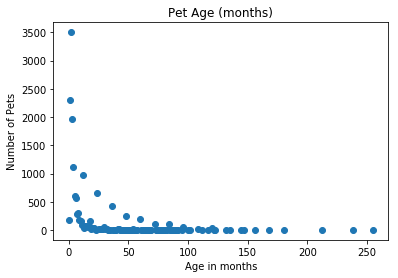

In [7]:
#Scatterplot of the age data in months (x=age, y = number of pets that age)

x = dfac['ageinmonths']
y = dfac['agecount']

plt.scatter(x, y)
plt.title('Pet Age (months)')
plt.xlabel('Age in months')
plt.ylabel('Number of Pets')
plt.show()


In [8]:
#Create a dataframe of agecounts in years
dfacy = dfa['ageinyears'].value_counts()
dfacy = dfacy.reset_index()

dfacy.columns = ['ageinyears','agecount']
dfacy = dfacy.sort_values('ageinyears')


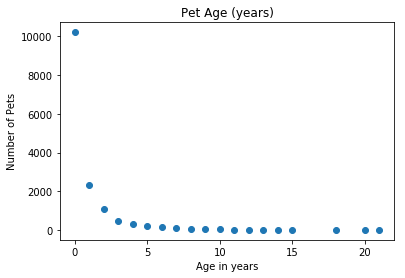

In [9]:
#Scatterplot of the age data in years (x=age, y = number of pets that age)

x = dfacy['ageinyears']
y = dfacy['agecount']

plt.scatter(x, y)
plt.title('Pet Age (years)')
plt.xlabel('Age in years')
plt.ylabel('Number of Pets')
plt.show()


In [10]:
#Drop pets with an age greater than 12 years (outlier and likely a data entry error)
dfacyd = dfacy[dfacy.ageinyears < 13]

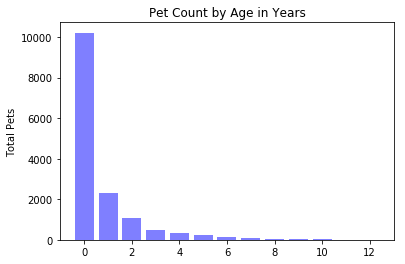

In [11]:
#Bar plot of age in years
plt.bar(dfacyd.ageinyears, dfacyd.agecount, color='b', align='center', alpha=0.5)
plt.ylabel('Total Pets')
plt.title('Pet Count by Age in Years')
plt.show()
 

<div class="span5 alert alert-info">
<p> <B>  Correlation with the Adoption Rate: </B>   
Correlation between age and adoption speed is only 10%
</p>
</div>

In [12]:
#Create a dataframe to calculate correlation
dfaa = dfi[['Age','AdoptionSpeed']]
dfaa['ageinyears'] = round(dfaa.Age/12)
dfaa.columns = ['ageinmonths','adoptionspeed','ageinyears']
dfaa = dfaa[dfaa.ageinyears < 13]
dfaa = dfaa[['ageinyears','adoptionspeed','ageinmonths']]
dfaa.head()

,ageinyears,adoptionspeed,ageinmonths
0,0.0,3,2
1,0.0,4,4
2,0.0,2,3
3,6.0,4,72
4,0.0,3,2


In [13]:
#Calculate pearson correlation between pet age and adoption speed
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)

    return corr_mat[0,1]

# Compute Pearson correlation coefficient
r = pearson_r(dfaa.ageinyears,dfaa.adoptionspeed)

# Print the result
print('Correlation value: ' + str(round(r,4)*100) + '%')

Correlation value: 10.09%


<div class="span5 alert alert-info">
<p> <B>  Other Points of Interest: </B>  
1. Adoption rate of pets <1 year old rounds up to 80%, while pets over 9 years old have around a 50% adoption rate.
</p>
</div>

In [14]:
#Create a pivot table of adoption speed versus age.
#dfaas = dfaa[['ageinyears','adoptionspeed']]
dfasa = dfaa.pivot_table(columns='adoptionspeed', index='ageinyears', values='ageinmonths', aggfunc='count',margins=True)
dfasa.columns = ['oneday','oneweek','onemonth','threemonths','notadopted','totals']

dfasa['%adoptedinoneday'] = round(dfasa.oneday/dfasa.totals,2)
dfasa['%notadopted'] = round(dfasa.notadopted/dfasa.totals,2)
dfasa

,oneday,oneweek,onemonth,threemonths,notadopted,totals,%adoptedinoneday,%notadopted
ageinyears,,,,,,,,
0.0,274.0,2357.0,3043.0,2301.0,2239.0,10214,0.03,0.22
1.0,68.0,312.0,489.0,451.0,989.0,2309,0.03,0.43
2.0,35.0,175.0,179.0,226.0,444.0,1059,0.03,0.42
3.0,9.0,87.0,101.0,76.0,214.0,487,0.02,0.44
4.0,6.0,64.0,71.0,60.0,121.0,322,0.02,0.38
5.0,6.0,51.0,56.0,50.0,65.0,228,0.03,0.29
6.0,5.0,10.0,39.0,33.0,39.0,126,0.04,0.31
7.0,2.0,15.0,30.0,34.0,32.0,113,0.02,0.28
8.0,3.0,8.0,14.0,11.0,16.0,52,0.06,0.31
